In [ ]:
%matplotlib notebook
from matplotlib import pyplot as plt
from skimage import img_as_float, io
from skimage import feature
from skimage.color import rgb2gray

sketch_dir = "../typicaldrawings-jpg/"
sketch_file = sketch_dir + "/" + "1st_floor_interior_50.jpg"

def plot_harris_points(image, filtered_coords):
    """ plots corners found in image"""

    plt.plot()
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_coords],
             [p[0] for p in filtered_coords],
             'r.')
    plt.show()


im = io.imread(sketch_file)
greyim = rgb2gray(im)


filtered_coords = feature.corner_harris(greyim, 
                                       )
plot_harris_points(greyim, filtered_coords)

In [200]:
import cv2

im = cv2.imread(sketch_file, 0)
im = cv2.medianBlur(im, 7)
#kernel = np.ones((25, 25), np.uint8)
#im_dilated = cv2.dilate()


#print(im)
imth = cv.adaptiveThreshold(im, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 71, 2)
#thresh, imth = cv.threshold(im, 180,255, cv.THRESH_BINARY)
plt.imshow(imth)

In [359]:
import numpy as np
from scipy.misc import imshow, imsave, imread
from skimage import color

# Try to get rid of lined paper background. Successful but would hinder recognition afterwards.
# Perhaps should try fft-ifft method: https://stackoverflow.com/questions/29360025/removing-lines-from-an-image-a-notebook-for-digit-detection-python?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa


In [497]:
import os, math
import cv2
import numpy as np

SATURATE_TH = 0.09
BG_HUE = 30   # read from gimp to be 60 deg

def remove_nongray(imhsv):
    """ Given an NxMx3 image, return gray image where non-gray pixels are set to gray
    """
    h, s, v = imhsv[:,:,0], imhsv[:,:,1], imhsv[:,:,2]
    #print(h.min(), h.max())
    #print(s.min(), s.max())
    #print(v.min(), v.max())
    
    nongray = s > SATURATE_TH * 255
    s[nongray] = 0
    v[nongray] = 255
    return imhsv

def nongray(s):
    """ s is NxM s values in an hsv image.
    """
    return s > SATURATE_TH * 255
    

def remove_rgb(imrgb, nongray, rgb):
    """ Given an NxMx3 imrgb and a nongray mask of True/False, remove rgb from the nongray pixels.
    """
    h, s, v = imhsv[:,:,0], imhsv[:,:,1], imhsv[:,:,2]
    
    nongray = s > SATURATE_TH * 255
    s[nongray] = 0
    v[nongray] = 255
    return imhsv


def get_lines(lines_in):
    if cv2.__version__ < '3.0':
        return lines_in[0]
    return [l[0] for l in lines]

sketch_file="../typicaldrawings-jpg/1st_floor_interior_50.jpg"
#sketch_file="../typicaldrawings-jpg/1st_floor_interior_new_wing-50.jpg"
#sketch_file="../typicaldrawings-jpg/2nd_floor_interior-50.jpg"


basename = os.path.splitext(sketch_file)[0]
img = cv2.imread(sketch_file)
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imghsv = remove_nongray(imghsv)
img = cv2.cvtColor(imghsv, cv2.COLOR_HSV2BGR)
cv2.imwrite(basename + '.1-unlind.jpg', img)
#plt.imshow(img)

black = np.zeros_like(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# a) adaptive thresholding
#ngedges = cv2.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 71, 2)
#ret,edges = cv2.threshold(ngedges,220,255,cv.THRESH_BINARY_INV)

# b) simple thresholding
ret,edges = cv2.threshold(gray,230,255,cv.THRESH_BINARY_INV)

# c) just invert the image, and threshold with TOZERO
#edges = 255 - gray
#ret, edges = cv2.threshold(edges, 50, 255, cv2.THRESH_TOZERO)
##edges = cv2.adaptiveThreshold(edges, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 71, 2)

#plt.imshow(edges)
cv2.imwrite(basename + '.2-edges.jpg', edges)
#1/0

minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/360,threshold=100,minLineLength=minLineLength,maxLineGap=maxLineGap)
print(len(lines), 'lines')
if (len(lines) > 0):
    for line in get_lines(lines):
        x1, y1, x2, y2 = line
        print(x1, y1, x2, y2, "len=", int(math.hypot(x1-x2, y1-y2)))
        cv2.line(img,(x1,y1),(x2,y2),(255,255,0),1)
        cv2.line(black, (x1, y1), (x2, y2), (255,255,0), 1)

    outfname = basename + '.3-lines.jpg'
    cv2.imwrite(outfname, black)



1519 lines
0 240 35 1583 len= 1343
0 313 11 1583 len= 1270
12 621 37 1583 len= 962
0 271 23 1583 len= 1312
15 684 39 1583 len= 899
0 466 9 1583 len= 1117
79 238 147 1358 len= 1122
969 239 981 447 len= 208
89 614 147 1568 len= 955
67 277 128 1275 len= 999
1005 550 1068 1583 len= 1034
18 749 40 1583 len= 834
0 714 7 1583 len= 869
77 237 116 864 len= 628
193 1566 911 1523 len= 719
510 510 997 480 len= 487
12 62 638 24 len= 627
27 1024 42 1583 len= 559
38 1005 39 1034 len= 29
97 502 99 544 len= 42
37 1274 44 1466 len= 192
1 376 22 1583 len= 1207
41 1003 45 1087 len= 84
230 528 459 514 len= 229
1022 844 1067 1583 len= 740
142 1375 147 1457 len= 82
50 1208 69 1572 len= 364
497 32 520 410 len= 378
10 382 33 823 len= 441
11 587 36 1577 len= 990
131 1234 135 1295 len= 61
126 1073 130 1128 len= 55
327 58 740 36 len= 413
51 70 509 42 len= 458
520 1583 1109 1578 len= 589
79 1029 112 1576 len= 547
0 868 6 1583 len= 715
116 967 117 982 len= 15
952 200 980 672 len= 472
966 306 976 445 len= 139
51 68 

945 527 972 554 len= 38
771 769 863 762 len= 92
942 751 966 751 len= 24
942 470 961 469 len= 19
555 1160 556 1179 len= 19
902 1526 1109 1514 len= 207
144 1336 146 1359 len= 23
731 696 744 687 len= 15
712 486 751 487 len= 39
721 638 779 655 len= 60
110 186 111 152 len= 34
0 681 6 1331 len= 650
442 574 460 579 len= 18
545 123 573 154 len= 41
986 421 986 441 len= 20
542 156 546 228 len= 72
325 809 398 776 len= 80
96 647 106 790 len= 143
956 240 961 317 len= 77
959 25 1080 5 len= 122
753 576 764 762 len= 186
1051 1414 1058 1519 len= 105
885 468 979 462 len= 94
456 36 513 98 len= 84
345 188 357 235 len= 48
601 603 634 613 len= 34
917 520 949 552 len= 45
149 91 162 100 len= 15
853 655 868 656 len= 15
1 1540 72 1541 len= 71
385 555 386 570 len= 15
518 623 527 749 len= 126
489 34 496 143 len= 109
107 746 113 847 len= 101
1018 1042 1020 1091 len= 49
88 1166 99 1351 len= 185
347 542 466 529 len= 119
1024 1494 1088 1583 len= 109
590 150 638 149 len= 48
614 699 624 695 len= 10
787 386 819 418 len=

329 784 335 801 len= 18
595 765 624 794 len= 41
789 1578 853 1578 len= 64
986 18 1058 6 len= 72
546 690 547 706 len= 16
982 641 1010 630 len= 30
1 1131 32 1101 len= 43
355 479 399 476 len= 44
942 624 965 673 len= 54
720 485 755 486 len= 35
251 513 282 511 len= 31
918 244 987 237 len= 69
777 497 781 526 len= 29
514 490 574 406 len= 103
44 1454 44 1402 len= 52
514 291 541 289 len= 27
721 774 732 773 len= 11
975 597 1010 597 len= 35
1043 1565 1085 1565 len= 42
763 394 764 404 len= 10
765 764 846 760 len= 81
912 543 932 532 len= 22
482 82 499 82 len= 17
688 727 718 706 len= 36
147 1488 150 1531 len= 43
727 683 737 677 len= 11
963 1560 1028 1556 len= 65
130 1108 132 1137 len= 29
176 344 187 529 len= 185
1 1132 32 1110 len= 38
714 111 718 136 len= 25
807 420 843 403 len= 39
454 574 465 639 len= 65
1021 1496 1082 1583 len= 106
516 479 519 524 len= 45
496 41 503 149 len= 108
840 1571 966 1569 len= 126
1 1122 32 1103 len= 36
1 1147 29 1129 len= 33
587 226 655 214 len= 69
570 737 593 721 len= 28

<IPython.core.display.Javascript object>


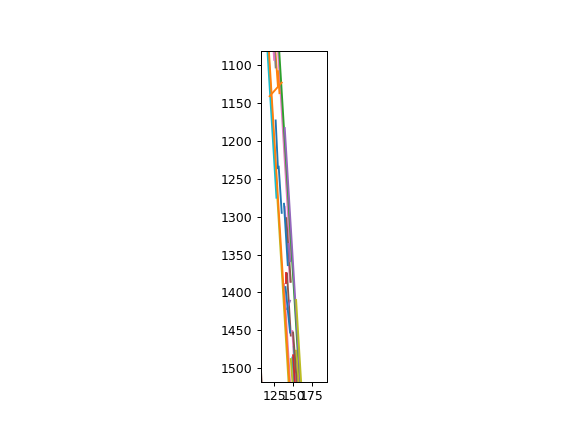

In [495]:
for line in get_lines(lines):
    x1, y1, x2, y2 = line
    plt.plot((x1, x2),  (y1, y2), '-')

plt.axis('image')
plt.gca().invert_yaxis()